# Artificial Intelligence Class, ECE NTUA 2021-2022: Lab Project 1

    

---

The purpose of this project is the implementation of search algorithms that find the best path in mazes of size $N\times N$. The Project is in Greek.

Quick Summary in English
---
Part 1:  
We create the NxN maze. For more info check out my repository at https://github.com/ag-george/Maze-Creation-in-Python.  

Part 2:  
A* algorithm implementation in Python.


# Εκφώνηση

## Part 1
Ο στόχος του πρώτου μέρους είναι η κατασκευή **λαβυρίνθων**. [Σε αυτό το άρθρο της Wikipedia](https://en.wikipedia.org/wiki/Maze_generation_algorithm) μπορείτε να βρείτε διάφορους αλγορίθμους για αυτό το σκοπό. Προσέξτε ότι οι αλγόριθμοι του παραπάνω άρθρου κατασκευάζουν ένα μόνο μονοπάτι από κάθε σημείο του λαβυρίνθου προς οποιοδήποτε άλλο (η δομή του λαβυρίνθου έχει μορφή συνεκτικού δέντρου). Καλείστε να τροποποιήσετε τον αλγόριθμο της επιλογής σας (ενδεχομένως και πέραν αυτών που υπάρχουν στο προαναφερθέν άρθρο) ώστε οι λαβύρινθοι που κατασκευάζει να έχουν τουλάχιστον δύο (2) μονοπάτια μεταξύ ενός σημείου αφετηρίας (S) και ενός σημείου τερματισμού (F). Η τροποποίηση του αλγορίθμου μπορεί να γίνει και με πιθανοτικό τρόπο, αλλά σε αυτή την περίπτωση θα πρέπει να βεβαιωθείτε πως οι λαβύρινθοι που θα χρησιμοποιήσετε στα επόμενα ερωτήματα έχουν τουλάχιστον δύο μονοπάτια μεταξύ των S και F. Αναφέρετε ποιον αλγόριθμο επιλέξατε, περιγράψτε τον συνοπτικά καθώς και τον τρόπο που αντιμετωπίσατε το παραπάνω πρόβλημα, και υλοποιήστε τον στο κελί κώδικα του Μέρους 1.

Σε όλα τα ερωτήματα φροντίστε να χρησιμοποιήσετε **δομημένο** κώδικα, με **σχόλια** που επισημαίνουν τη λογική του.


### Παραδείγματα λαβυρίνθων
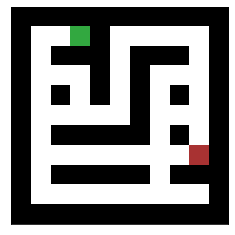
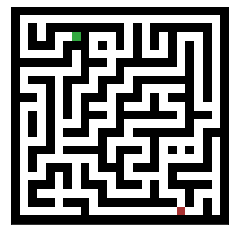
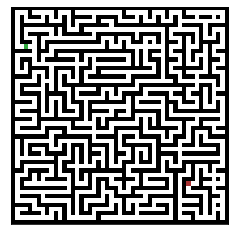

---

## Part 2

Στο δεύτερο μέρος της εργασίας θα υλοποιήσετε τον αλγόριθμο Α* για την εύρεση συντομότερων μονοπατιών μεταξύ δυο κόμβων για τους λαβυρίνθους που παράγονται από τον κώδικα του πρώτου μέρους. Θα κατασκευάσετε και διάφορες συναρτήσεις κόστους τόσο για την μέτρηση των πραγματικών αποστάσεων όσο και για την εκτίμηση των αποστάσεων από έναν κόμβο στον κόμβο στόχο (heuristic).

Η γενική μορφή της συνάρτησης κόστους στον αλγόριθμο Α* είναι:
$$f(n)=g(n)+h(n)$$
Παραπάνω, η συνάρτηση $g(n)$ δίνει την πραγματική απόσταση από το σημείο εκκίνησης μέχρι τον κόμβο $n$, και η συνάρτηση $h(n)$ αποτελεί μια ευριστική της απόστασης από τον κόμβο $n$ μέχρι τον στόχο. Σας ζητείται να πειραματιστείτε με τις εξής επιλογές για τις δύο συναρτήσεις:
* $g(n)=0$ και $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Ποιος αλγόριθμος αναζήτησης προκύπτει; Μπορεί να βρει πάντα το βέλτιστο μονοπάτι;
* $g(n)=1$ και $h(n)=0$. Ποιος αλγόριθμος αναζήτησης προκύπτει; Μπορεί να βρει πάντα το βέλτιστο μονοπάτι;
* $g(n)=1$ και $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Ποιος αλγόριθμος αναζήτησης προκύπτει; Μπορεί να βρει πάντα το βέλτιστο μονοπάτι;

Μπορείτε να προτείνετε και άλλες ευριστικές συναρτήσεις εκτός από τις αποστάσεις manhattan και euclidean;

---

# Visualization code


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

class visualization:
    def __init__(self, S, F):
        '''
          Η μέθοδος αυτή αρχικοποιεί ένα αντικείμενο τύπου visualization.
          Είσοδος: 
          -> S: το σημείο εκκίνσης της αναζήτησης
          -> F: το σημείο τερματισμού
        '''
        self.S = S
        self.F = F
        self.images = []
    
    def draw_step(self, grid, frontier, expanded_nodes):
        '''
          Η συνάρτηση αυτή καλείται για να σχεδιαστεί ένα frame στο animation (πρακτικά έπειτα από την επέκταση κάθε κόμβου)
          Είσοδος: 
          -> grid: Ένα χάρτης τύπου grid
          -> frontier: Μια λίστα με τους κόμβους που ανήκουν στο μέτωπο της αναζήτησης
          -> expanded_nodes: Μια λίστα με τους κόμβους που έχουν ήδη επεκταθεί
          Επιστρέφει: None
          Η συνάρτηση αυτή πρέπει να καλεστεί τουλάχιστον μια φορά για να μπορέσει να σχεδιαστει ένα animation (πρεπεί το animation να έχει τουλάχιστον ένα frame).
        '''
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
        image[~grid.grid] = [0, 0, 0]
        image[grid.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[grid.grid] = [0, 0, 0]
        # image[~grid.grid] = [255, 255, 255]
        
        for node in expanded_nodes:
            image[node] = [0, 0, 128]

        for node in frontier:
            image[node] = [0, 225, 0]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)
    
    def add_path(self, path):
        '''
          Η συνάρτηση αυτή προσθέτει στο τελευταίο frame το βέλτιστο μονοπάτι.
          Είσοδος:
          -> path: Μια λίστα η όποια περιέχει το βέλτιστο μονοπάτι (η οποία πρέπει να περιέχει και τον κόμβο αρχή και τον κόμβο στόχο)
          Έξοδος: None
        '''
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        for _ in range (100):
            self.images.append(image)
        
    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani
        
    def save_gif(self, filename, fps = 30):
        '''
            Η συνάρτηση αυτή ξαναδημιουργεί και αποθηκεύει το animation σε ένα αρχείο.
            Είσοδος:
            -> Το όνομα του αρχείου με κατάληξη .gif
            Έξοδος: (None)
        '''
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        '''
            Η συνάρτηση αυτή εμφανίζει inline το animation.
            Είσοδος:
            -> fps: τα frames per second
            Έξοδος: Το αντικείμενο που παίζει το animation
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        '''
            Η μέθοδος αυτή εμφανίζει inline το τελευταίο frame που έχει δημιουργήθει.
            Είσοδος:
            Έξοδος: Το αντικείμενο που εμφανίζει την εικόνα.
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

# Solution



## Part 1

Στο παρακάτω κελί κώδικα σας δίνεται ο σκελετός της κλάσης ```Maze```, όπου και θα υλοποιήσετε τον αλγόριθμο κατασκευής λαβυρίνθων. Για να λειτουργεί σωστά η οπτικοποίηση, ο λαβύριθνος αναπαριστάται ως ένας $N\times{N}$ boolean πίνακας στο attribute ```grid``` της κλάσης. Η τιμή ```False``` σε ένα κελί του πίνακα αναπαριστά την ύπαρξη εμποδίου στο σημείο αυτό, ενώ η τιμή ```True``` ελεύθερο κελί.


Μπορείτε να τροποποιήσετε τον δοσμένο κώδικα όπως θέλετε.

In [ ]:
%matplotlib inline
import numpy as np
from queue import LifoQueue
import  random 
import matplotlib.pyplot as plt


class Maze:
    def __init__(self, N, S, F):

      """
      N: integer that indicates the size of the NxN grid of the maze
      S: pair of integers that indicates the coordinates of the starting point (S)
      F: pair of integers that indicates the coordinates of the finish point (F)
      You can add any other parameters you want to customize maze creation (e.g. variables that
      control the creation of additional paths)
      """

      assert N > 2

      ## Make sure start and end are within the grid

      assert S[0] < N-1
      assert S[1] < N-1
      assert F[0] < N-1
      assert F[1] < N-1

      assert S[0] > 0
      assert S[1] > 0
      assert F[0] > 0
      assert F[1] > 0

      # Add here any additional constraints your implementation may have

      self.N = N
      self.S = S
      self.F = F

      # Grid initialized with obstacles (array of 0/False)
      # 1/True indicates available cells
      self.grid = np.zeros((N, N), dtype=bool)
      
      ## my code - START

      #if N==4 it's a simple path
      if N==4:
        if S[0]!=F[0] and S[1]!= F[1]:
          self.grid[S[0]][F[1]]=1

      if N>4:
        #list including all cells
        path = []
        #add Start to that list
        path.append(S)

        #list including cells that can be extended
        ext_path = []
        #add Start to that list
        ext_path.append(S)

        #list including all possible frontiers 
        frontiers = []

        #start from S - check for valid frontier cells and add them to frontiers[]
        if S[0] > 0 and S[1] - 2 > 0 and S[0] < N - 1 and S[1] - 2 < N-1:
          frontiers.append((S[0], S[1] - 2))
        if S[0] > 0 and S[1] + 2 > 0 and S[0] < N - 1 and S[1] + 2 < N-1:
          frontiers.append((S[0], S[1] + 2))
        if S[0] + 2 > 0 and S[1] > 0 and S[0] + 2 < N - 1 and S[1] < N-1:
          frontiers.append((S[0] + 2, S[1]))
        if S[0] - 2 > 0 and S[1] > 0 and S[0] - 2 < N - 1 and S[1] < N-1:
          frontiers.append((S[0] - 2, S[1]))
 
        #F must not be trapped in a cell that can't be reached by the path, therefore we must make sure there is a free portal to it
        barrier = []

        #sum Upper Left
        sumUR=0

        #sum Upper Right
        sumUR=0

        #sum Down Left
        sumDL=0
        
        #sum Down Right
        sumDR=0

        while frontiers:
          #choose a random frontier cell
          B = random.choice(frontiers)
        
          #add B to both te path[] and the ext_path[]
          path.append(B)
          if B not in ext_path:
            ext_path.append(B)

          #a new frontier has been chosen. We check whether there is a +2 neighbor in ext_path and if there are more than just one we choose randomly
          #We create this list to choose towards wich path-cell the chosen frontier will be expanded to
          extend_from=[]
          if B[0] > 0 and B[1] - 2 > 0 and B[0] < N - 1 and B[1] - 2 < N-1:
            if ((B[0], B[1] - 2)) in ext_path:
              extend_from.append((B[0], B[1] - 2))

          if B[0] > 0 and B[1] + 2 > 0 and B[0] < N - 1 and B[1] + 2 < N-1:
            if ((B[0], B[1] + 2)) in ext_path:
              extend_from.append((B[0], B[1] + 2))

          if B[0] + 2 > 0 and B[1] > 0 and B[0] + 2 < N - 1 and B[1] < N-1:
            if ((B[0] + 2, B[1])) in ext_path:
              extend_from.append((B[0] + 2, B[1]))

          if B[0] - 2 > 0 and B[1] > 0 and B[0] - 2 < N - 1 and B[1] < N-1:
            if ((B[0] - 2, B[1])) in ext_path:
              extend_from.append((B[0] - 2, B[1]))
      
          #print(extend_from)
          W = random.choice(extend_from)
        
          #cell in between becomes Passage
          x=(B[0]-W[0])//2 + W[0]
          y=(B[1]-W[1])//2 + W[1]
          C=(x,y)
          if len(barrier)==0 or ((len(barrier)>0) and (C not in barrier)):
            #B must now become part of the path and therefore
            self.grid[B[0]][B[1]]=1
            #C must now become part of the path and therefore
            self.grid[x][y]=1
          else:
            #this path does not fit, we try another one and therefore we restore the data objects
            path.remove(B)
            ext_path.remove(B)
            continue

          #we add C in paths' list BUT NOT in ext_path[] as it cannot be extended
          path.append(C) 
      
          #we define new frontiers
          if B[0] > 0 and B[1] - 2 > 0 and B[0] < N - 1 and B[1] - 2 < N-1:
            if ((B[0], B[1] - 2)) not in path:
              if ((B[0], B[1] - 2)) not in frontiers:
                frontiers.append((B[0], B[1] - 2))
          if B[0] > 0 and B[1] + 2 > 0 and B[0] < N - 1 and B[1] + 2 < N-1: 
            if ((B[0], B[1] + 2)) not in path: 
              if ((B[0], B[1] + 2)) not in frontiers:
                frontiers.append((B[0], B[1] + 2))
          if B[0] + 2 > 0 and B[1] > 0 and B[0] + 2 < N - 1 and B[1] < N-1: 
            if ((B[0] + 2, B[1])) not in path: 
              if ((B[0] + 2, B[1])) not in frontiers:
                frontiers.append((B[0] + 2, B[1]))
          if B[0] - 2 > 0 and B[1] > 0 and B[0] - 2 < N - 1 and B[1] < N-1: 
            if ((B[0] - 2, B[1])) not in path:
              if ((B[0] - 2, B[1])) not in frontiers:
                frontiers.append((B[0] - 2, B[1]))
      
          #remove B from frontiers' list
          frontiers.remove(B)

          
          #now we have to make sure that the final cell F will remain accessible by S. That's why we will keep track of F's neighbor's in TRIPLETS.
          
          #sum Upper Left
          sumUL=int(self.grid[F[0]][F[1]-1])+int(self.grid[F[0]-1][F[1]-1])+int(self.grid[F[0]-1][F[1]])
          if sumUL==2:

            if ((F[0], F[1]-1)) not in path and ((F[0], F[1]-1)) not in barrier:
              #if two neighbors have been set already the third has to become a barrier
              barrier.append((F[0], F[1]-1))

            #diagonal neighbors are not considered to be expanded to F
            if ((F[0]-1, F[1]-1)) not in path and ((F[0]-1, F[1]-1)) not in barrier:
              barrier.append((F[0]-1, F[1]-1))
          
            if ((F[0]-1, F[1])) not in path and ((F[0]-1, F[1])) not in barrier:
              barrier.append((F[0]-1, F[1]))


          #sum Upper Right
          sumUR=int(self.grid[F[0]][F[1]+1])+int(self.grid[F[0]-1][F[1]+1])+int(self.grid[F[0]-1][F[1]])
          if sumUR==2:

            if ((F[0], F[1]+1)) not in path and ((F[0], F[1]+1)) not in barrier:
              barrier.append((F[0], F[1]+1))

            if ((F[0]-1, F[1]+1)) not in path and ((F[0]-1, F[1]+1)) not in barrier:
              barrier.append((F[0]-1, F[1]+1))

            if ((F[0]-1, F[1])) not in path and ((F[0]-1, F[1])) not in barrier:
              barrier.append((F[0]-1, F[1]))
            

          #sum Down Left
          sumDL=int(self.grid[F[0]][F[1]-1])+int(self.grid[F[0]+1][F[1]-1])+int(self.grid[F[0]+1][F[1]])
          if sumDL==2:

            if ((F[0], F[1]-1)) not in path and ((F[0], F[1]-1)) not in barrier:
              barrier.append((F[0], F[1]-1))
            

            if ((F[0]+1, F[1]-1)) not in path and ((F[0]+1, F[1]-1)) not in barrier:
              barrier.append((F[0]+1, F[1]-1))

            if ((F[0]+1, F[1])) not in path and ((F[0]+1, F[1]-1)) not in barrier:
              barrier.append((F[0]+1, F[1]))
            

          #sum Down Right
          sumDR=int(self.grid[F[0]][F[1]+1])+int(self.grid[F[0]+1][F[1]+1])+int(self.grid[F[0]+1][F[1]])
          if sumDR==2:

            if ((F[0], F[1]+1)) not in path and ((F[0], F[1]+1)) not in barrier:
              barrier.append((F[0], F[1]+1))
            
            if ((F[0]+1, F[1]+1)) not in path and ((F[0]+1, F[1]+1)) not in barrier:
              barrier.append((F[0]+1, F[1]+1))

            if ((F[0]+1, F[1])) not in path and ((F[0]+1, F[1])) not in barrier:
              barrier.append((F[0]+1, F[1]))
    

        #checks for diagonal neighbors of F - connect them with only one crossed neighbor
        #UL
        #a cell of this list will randomly turn into passage to F
        ULplus = []
        #no extra checks need as perimeter has values of 0 and therefore it will get into the condition
        if int(self.grid[F[0]-1][F[1]-1])==1 and sumUL==1 and sumUR<2 and sumDR<2 and sumDL<2:
          if ((F[0]-1, F[1]-1)) not in barrier:
              ULplus.append((F[0], F[1]-1))
              ULplus.append((F[0]-1, F[1]))
              Z = random.choice(ULplus)
              self.grid[Z[0]][Z[1]]=1
        #UR
        URplus = []
        if int(self.grid[F[0]-1][F[1]+1])==1 and sumUR==1 and sumUL<2 and sumDR<2 and sumDL<2:
          if ((F[0]-1, F[1]+1)) not in barrier:
              URplus.append((F[0], F[1]+1))
              URplus.append((F[0]-1, F[1]))
              Z = random.choice(URplus)
              self.grid[Z[0]][Z[1]]=1
          

        #DR
        DRplus = []
        if int(self.grid[F[0]+1][F[1]+1])==1 and sumDR==1 and sumUL<2 and sumUR<2 and sumDL<2:
          if ((F[0]+1, F[1]+1)) not in barrier:
              DRplus.append((F[0], F[1]+1))
              DRplus.append((F[0]+1, F[1]))
              Z = random.choice(DRplus)
              self.grid[Z[0]][Z[1]]=1

        #DL
        DLplus = []
        if int(self.grid[F[0]+1][F[1]-1])==1 and sumDL==1 and sumUL<2 and sumUR<2 and sumDR<2:
          if ((F[0]+1, F[1]-1)) not in barrier:
              DLplus.append((F[0], F[1]-1))
              DLplus.append((F[0]+1, F[1]-1))
              Z = random.choice(DLplus)
              self.grid[Z[0]][Z[1]]=1


      #final check for F outside of the while loop - mirrored black neighbor cells lead to mirrored white neighbor cells of F
      if int(self.grid[F[0]-1][F[1]])==0 and int(self.grid[F[0]+1][F[1]])==0:
        if F[0] > 0 and F[0] < N - 1 and F[1] - 1 > 0 and F[1] - 1 < N - 1:
          self.grid[F[0]][F[1]-1]=1
        if F[0] > 0 and F[0] < N - 1 and F[1] + 1 > 0 and F[1] + 1 < N - 1:  
          self.grid[F[0]][F[1]+1]=1

      if int(self.grid[F[0]][F[1]-1])==0 and int(self.grid[F[0]][F[1]+1])==0:
        if F[0] - 1 > 0 and F[0] - 1 < N - 1 and F[1] > 0 and F[1] < N - 1:
          self.grid[F[0]-1][F[1]]=1
        if F[0] + 1 > 0 and F[0] + 1 < N - 1 and F[1] > 0 and F[1] < N - 1:
          self.grid[F[0]+1][F[1]]=1
        
        
         

      
      #turn three (3) extra cells into passage to create at least one more path
      count = 0
      i=0
      #randomly choose coordinates 
      self.grid[S[0]][S[1]]=1
      self.grid[F[0]][F[1]]=1
      #max number of iterations to avoid infinte loop set to 100
      while i <100:
        i+=1
        x = random.randrange(1,N-1,1)
        y = random.randrange(1,N-1,1)
        if int(self.grid[x][y])==0:
          if (int(self.grid[x][y-1])==0 and int(self.grid[x][y+1])==0 and int(self.grid[x-1][y])==1 and int(self.grid[x+1][y])==1):
            self.grid[x][y]=1
            count+=1 
          if (int(self.grid[x][y-1])==1 and int(self.grid[x][y+1])==1 and int(self.grid[x-1][y])==0 and int(self.grid[x+1][y])==0):
            self.grid[x][y]=1
            count+=1
          if count==3:
            break
        else:
          continue

      ## my code - END


    def draw_map(self, path=None):
        """ Draws the maze as an image. Considers grid values of 0/False to represent obstacles and
        values of 1/True to represent empty cells, but this can be customized. Obstacles are painted
        black and empty cells are painted white. Starting point is painted green and finish point red.
        Optionally accepts as a parameter a path within the maze which is painted blue. 
        """
        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[~self.grid] = [0, 0, 0]
        image[self.grid] = [255, 255, 255]

        # Uncomment the next 2 lines of code to treat 1/True as obstacles (and 0/False as free maze cells)
        # image[self.grid] = [0, 0, 0]
        # image[~self.grid] = [255, 255, 255]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]

      

        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()

### Test examples

---

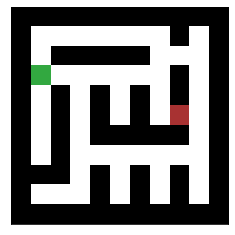

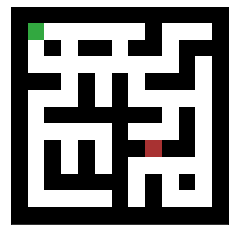

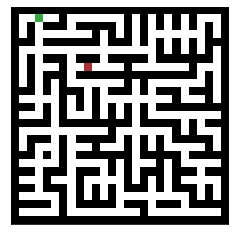

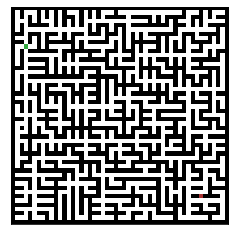

In [ ]:
for N, S, F in (11, (3, 1), (5, 8)), (13, (1, 1), (8, 8)), (27, (1, 3), (7, 9)), (51, (9, 3), (44, 44)):
    map = Maze(N, S, F)
    map.draw_map()

### Comments

Η λύση μας βασίζεται στον αλγόριθμο του Prim. Από το αρχικό κελί αναζητούμε εντός του λαβυρίνθου και σε απόσταση +2 κάθε φορά πιθανούς γείτονες. Κατόπιν γίνεται τυχαία επιλογή ενός από αυτούς κάθε φορά. Τον κάνουμε λευκό (Passage) όπως και το κελί ανάμεσα σε αυτόν και το αρχικό, και αναδρομικά βρίσκουμε τους δικούς του +2 γείτονες, επιλέγουμε έναν, τον κάνουμε λευκό (Passage) όπως και το κελί ανάμεσα σε αυτόν και τον αρχικό κλπ. 

Ωστόσο ο αλγόριθμος έπρεπε να πληροί και κάποιες συγκεκριμένες συνθήκες. Η ύπαρξη επιπλέον μονοπατιών διασφαλίζεται με την τυχαία τοποθέτηση επιπλέον λευκών κελιών (Passage) στο grid υπό συγκεκριμένες προϋποθέσεις που αναφέρονται στα σχόλια. Σημαντικό κομμάτι του κώδικά μας αφιερώθηκε στο να διασφαλιστεί ότι το κελί F ούτε θα απομονωθεί ποτέ (και άρα δε θα μπορέσει ποτέ να γίνει επισκεπτό) ούτε και ως κελί με προκαθορισμένη θέση θα δημιουργήσει ποτέ λευκό τετράγωνο 2x2, ειδικά σε περιπτώσεις με άρτιο N.

Συγκεκριμένα επιλέξαμε να κάνουμε διαδοχικούς ελέγχους για τις τέσσερις ομάδες τριών γειτόνων του F. Αν 2 στους 3 άμεσους γείτονες του F που σχηματίσουν κεφαλαίο Γ γίνουν λευκοί ο τέταρτος πρέπει να γίνει μαύρος (εμπόδιο)  με τιμή 0 για να μην δημιουργηθεί λευκό τετράγωνο 2x2 γύρω από το F.

Στο τέλος και για να αποφύγουμε την ύπαρξη φαινομένου σκακιέρας γύρω από τον F διασφαλίζουμε οτι θα υπάρχει κατάλληλο Passage προσθέτοντας λευκό κελί εφόσον αυτό χρειάζεται.

## Part 2

Παρακάτω σας δίνετε ο σκελετός της κλάσης Pathfinder η οποία αρχικοποιείται με ένα αντικείμενο ```Maze``` (από το πρώτο μέρος), τη συνάρτηση πραγματικού κόστους ```c``` και την ευριστική ```h```. Σε αυτήν θα υλοποιήσετε τον αλγόριθμο αναζήτησης Α*.



In [ ]:
class Pathfinder:
    def __init__(self, maze, c, h):
        """
        maze : Αντικείμενο τύπου Maze (από Μέρος 1)
        c : Συνάρτηση που υπολογίζει την πραγματική απόσταση μεταξύ δύο σημείων
        h : Συνάρτηση που υπολογίζει την ευριστική μεταξύ δύο σημείων
        """
        self.maze = maze
        self.vis = visualization(maze.S, maze.F)
        self.path = []
        self.cost = c
        self.heuristic = h

        ### Fill the path list with the coordinates of each point in the path from maze.S to maze.F
        ### Your code here

        ### MY CODE - START

        #we extract useful information from the maze
        N=self.maze.N
        S=self.maze.S
        F=self.maze.F
      

        #we create this new class named 'Cell' in order to store information about each cell that is needed by the Algorithm
        class Cell:
            def __init__(self, parent, location):
              self.parent = parent
              parent = None
              self.location = location
              location = None
              self.c = self.h = self.f = 0 

        #function for A*'s implementation
        def Astar(maze): #we don't need other parameters as they are provided by 'maze'

          #create the lists of metopo_anazitisis and kleisto_synolo
          metopo_anazitisis = []  
          kleisto_synolo = []

          #start and final cells are of class 'Cell'
          start = Cell(None, S)
          start.c = start.h = start.f = 0

          final = Cell(None, F)
          final.c = final.h = final.f = 0
            
          #add starting cell to metopo_anazitisis
          metopo_anazitisis.append(start)  
    
          #According to A* we run the algorithm until metopo_anazitisis is empty
          while metopo_anazitisis:

              #let's find the cell with the least f value in metopo_anazitisis 
              current = metopo_anazitisis[0] 
              index_of_current = 0
              i=0
              for cell in metopo_anazitisis:  
                if current.f > cell.f:
                  index_of_current = i
                  current = cell
                i+=1
        
              #according to A* algorithm we now have to move the current cell from metopo_anazitisis to kleisto_synolo 
              metopo_anazitisis.pop(index_of_current)

              #we don't want cells to get added multiple times in kleisto_synolo
              in_kleisto_synolo = False
              existed_index = 0
              j=0
              for i in kleisto_synolo:
                if i.location == current.location:
                  in_kleisto_synolo = True
                  existed_index = j
                j+=1

              if not in_kleisto_synolo:
                kleisto_synolo.append(current)
          
        
              # We reached the Final Cell - (path is returned in reverse but this is not a problem when depicted graphically)
              if current.location == F:
                  while current:
                      self.path.append(current.location)
                      current = current.parent
                  return self.path
        
        
              # time to expand our possible path by looking for cells around our current cells that could potentially get added to the path  
              children = []
            
              if current.location[0]-1 > 0 and current.location[0]-1 < N-1 and current.location[1] > 0 and current.location[1] < N-1:
                if int(self.maze.grid[current.location[0]-1][current.location[1]]) == 1:
                  children.append(Cell(current, (current.location[0]-1, current.location[1])))

              if current.location[0]+1 > 0 and current.location[0]+1 < N-1 and current.location[1] > 0 and current.location[1] < N-1:
                if int(self.maze.grid[current.location[0]+1][current.location[1]]) == 1:
                  children.append(Cell(current, (current.location[0]+1, current.location[1])))

              if current.location[1]+1 > 0 and current.location[1]+1 < N-1 and current.location[0] > 0 and current.location[0] < N-1:
                if int(self.maze.grid[current.location[0]][current.location[1]+1]) == 1:
                  children.append(Cell(current, (current.location[0], current.location[1]+1)))

              if current.location[1]-1 > 0 and current.location[1]-1 < N-1 and current.location[0] > 0 and current.location[0] < N-1:
                if int(self.maze.grid[current.location[0]][current.location[1]-1]) == 1:
                  children.append(Cell(current, (current.location[0], current.location[1]-1)))


              #let's check whether the children can be added to metopo_anazitisis   
              for child in children:

                  #let's count c,h,f   
                  child.c = current.c + c(child.location[0],child.location[1]) 
                  child.h = h(child.location, final.location)  
                  child.f = child.c + child.h

                  #we now check whether that specific child is already part of kleisto_synolo
                  k=0
                  index_of_child = 0
                  child_in_kleisto_synolo = False
                  for i in kleisto_synolo:
                    if i.location == child.location:
                      child_in_kleisto_synolo = True
                      index_of_child = k
                    k+=1
                  
                  #we check whether the child is already included in kleisto_synolo
                  if child_in_kleisto_synolo:
                    #if child is included in kleisto_synolo with a higher c-value it gets removed from it
                    if child.c < kleisto_synolo[index_of_child].c:
                      kleisto_synolo.remove(index_of_child)
                    else:
                      #if child is included in kleisto_synolo with a lower c-value we continue
                      continue
               

                  #Now, before we add the child to metopo_anazitisis we have to make sure there is no shorter path leading to it already existing in metopo_anazitisis
                  shorter_path_in_metopo_anazitisis = False
                  j=0
                  for i in metopo_anazitisis:
                    if i.location == child.location:
                      if i.c < child.c:
                        shorter_path_in_metopo_anazitisis = True

                  #if there is no shorter path in metopo_anazitisis already leading to the child we add it to it
                  if not shorter_path_in_metopo_anazitisis:
                    metopo_anazitisis.append(child)
    
        #let's run the algorithm
        Astar(maze)

        ### MY CODE - END

    def get_path(self):
        return self.path

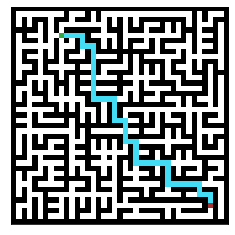

In [ ]:
import math

## A heuristic - manhattan
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

## A heuristic - eucledian
def eucledian(a, b):
    return int(((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5)

## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)

## Find and visualize the path - each time one of the two functions will be chosen and the other will remain a comment
pf = Pathfinder(maze=maze, c = lambda x, y: 1, h = manhattan)
#pf = Pathfinder(maze=maze, c = lambda x, y: 1, h = eucledian)
maze.draw_map(pf.get_path())


In [ ]:
import time

t1=time.perf_counter()
Pathfinder(maze=maze, c = lambda x, y: 1, h=manhattan)
#Pathfinder(maze=maze, c = lambda x, y: 1, h = eucledian)
t2 = time.perf_counter()

print(t2-t1)  


0.018953553000756074


Απαντήσεις στις θεωρητικές ερωτήσεις

Λίγα λόγια για τον κώδικα:

Αφού είχαμε κάνει την απαραίτητη προεργασία και προκειμένου να μπορέσουμε να διαχειριστούμε τα δεδομένα που αφορούν κάθε κελί του λαβυρίνθου (π.χ. g, f, h, γονέας, θέση) εμπνευστήκαμε τη γενική ιδέα της δημιουργίας της επιπλέον κλάσσης 'Cell', η οποία θα αποθηκεύει αυτά τα δεδομένα, από το άρθρο που παραθέτουμε:
https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2


Περιπτώσεις:

-> 𝑔(𝑛)=0  και  ℎ(𝑛)={manhattan(𝑛),euclidean(𝑛)} 

Πρόκειται για τον Bist First που ως γνωστόν δεν επιστρέφει απαραίτητα το βέλτιστο μονμοπάτι.

-> 𝑔(𝑛)=1  και  ℎ(𝑛)=0 

Πρόκειται για τον Dijkstra. Καταλήγουμε σε αυτό το συμπέρασμα αφού έχουμε μη κατευθυνόμενο γράφο με μη αρνητικά βάρη, η βέλτιστη λύση αναζητάται με greedy τρόπο και πρόκειται για μη πληροφορημένη αναζήτηση.

-> 𝑔(𝑛)=1  και  ℎ(𝑛)={manhattan(𝑛),euclidean(𝑛)} 

Πρόκειται για τον Α* ο οποίος βρίσκει βέλτιστο μονοπάτι αν η τιμή της ευριστικής για κάθε κόμβο είναι μικρότερη ή ίση από την πραγματική τιμή του κόμβου.

Μία επιπλέον ευριστική που θα μπορούσαμε να χρησιμοποιήσουμε είναι η απόσταση Chebyshev, γνωστή και ως chessboard distance, που για δύο σημεία (x1, y1), (x2, y2) ισούται με: D = max(|x2-x1|, |y2-y1|)
(Πηγή: Wikipedia).